### **Intro Sprint #1**
# Data Collection and Cleaning with Jupyter 

## Introduction to Jupyter Notebook

Jupyter Notebook is a really easy and user friendly way to experiment with Python code, combining code with notes and documentation. You can do all of this without having use the command line, and the resulting file can be easily published and shared with other people.

An Jupyter Notebook consists of a number of "cells," stacked on the page from top to bottom. Cells can have text or code in them. You can change a cell's type using the "Cell" menu at the top of the page; go to Cell > Cell Type and select either Code for Python code or Markdown for text. (You can also change this for the current cell using the drop-down menu in the toolbar.)

#### Text Cells
Make a new cell, change its type to Markdown, type some stuff and click run. Jupyter Notebook will "render" the text and display it on the page in rendered format. You can hit Enter or click in the cell to edit its contents again. Text in Markdown cells is rendered according to a set of conventions called Markdown, a language for marking up text using formatting instructions.

#### Code Cells


In [50]:
print("This is a code cell.")
print("")
print("Any Python code you type in this cell will be run when you press the 'Run' button,")

This is a code cell.

Any Python code you type in this cell will be run when you press the 'Run' button,


You can define variables or import modules in one code cell and it will be available for you to in all subsequent code cells.

In [51]:
import random
animals = ["dog", "cat", "elephant", "zebra"]

Now, you can use the list of animals and the random module in the cell below.

In [52]:
print(random.choice(animals))

dog


## Python Modules

Modules refer to a file containing Python statements and definitions. Above, we imported the random module which has many functions for randomizing distributions of numbers. We used the choice function which returns a random element from a sequence.

Throughout, we will be using common modules.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Data Collection

For the purposes of our introductory sprint, we will be collecting data either through importing a csv file or web scraping (specifically with social media), but we will focus on web scraping in a later notebook.

In this, we will be using a dataset on poverty measures in New York City. This data was downloaded from [NYC Open Data](https://data.cityofnewyork.us/City-Government/NYCgov-Poverty-Measure-Data-2018-/cts7-vksw).

In [67]:
poverty = pd.read_csv('nyc_poverty_2018.csv')

We can use the head function to show the first five rows of the dataset (or tail to show the last five rows). We can also use the shape function to see the dimensions of our dataset.

In [68]:
display(poverty.head())
print(poverty.shape)

,SERIALNO,SPORDER,PWGTP,WGTP,AGEP,CIT,REL,SCH,SCHG,SCHL,...,Povunit_ID,Povunit_Rel,PreTaxIncome_PU,RETP_adj,RNTP_adj,SEMP_adj,SSIP_adj,SSP_adj,TotalWorkHrs_PU,WAGP_adj
0,1,1,95,95,31,1,0,1,0,22.0,...,1,1,127650.22,0.0,0.0,0.0,0.0,0.000,2,127650.220
1,16,1,181,181,63,1,0,1,0,22.0,...,1,1,346479.19,0.0,0.0,0.0,0.0,0.000,2,182357.450
2,16,2,210,181,65,1,1,1,0,19.0,...,1,2,346479.19,0.0,0.0,0.0,0.0,12157.164,2,0.000
3,47,1,62,62,68,4,0,1,0,1.0,...,1,1,155003.84,0.0,0.0,0.0,0.0,27353.619,1,91178.727
4,47,2,71,62,63,4,1,1,0,1.0,...,1,2,155003.84,0.0,0.0,0.0,0.0,0.000,1,36471.492


(68273, 61)


After looking at our data, we can see that we have a ton of columns (61), and the columns don't seem to have very self explanatory names. On the NYC Open Data website, the dataset comes with a data dictionary that explains the columns. If you want, you can look at all the column descriptions. But, for our purposes, we will just show you how to rename them and drop unnecassry columns.

We will drop uncessary columns by only selecting the ones we want to keep. There are many more ways to drop columns that you can search up.

In [73]:
poverty = poverty[['AgeCateg', 'Boro','CitizenStatus', 'EducAttain', 'EST_Childcare', 'EST_PovGap', 'Ethnicity']]
poverty.head()

,AgeCateg,Boro,CitizenStatus,EducAttain,EST_Childcare,EST_PovGap,Ethnicity
0,2,2,1,4.0,0.0,0.0,4
1,2,3,1,4.0,0.0,0.0,1
2,3,3,1,3.0,0.0,0.0,1
3,3,2,2,1.0,0.0,0.0,1
4,2,2,2,1.0,0.0,0.0,1


Now, let's rename our columns into something more descriptive and drop all rows with na values.

In [79]:
poverty.rename(columns = {'AgeCateg' : 'age', 'Boro' : 'borough', 'CitizenStatus' : 'citizen', 'EducAttain' : 'education',
                                         'EST_Childcare' : 'childcare', 'EST_PovGap' : 'pov_gap','Ethnicity' : 'ethnicity'},
               inplace = True)
poverty.dropna()
poverty.head()

,age,borough,citizen,education,childcare,pov_gap,ethnicity
0,2,2,1,4.0,0.0,0.0,4
1,2,3,1,4.0,0.0,0.0,1
2,3,3,1,3.0,0.0,0.0,1
3,3,2,2,1.0,0.0,0.0,1
4,2,2,2,1.0,0.0,0.0,1


We can rename column names to make them easier to work with later on. In this we created a [for loop](https://wiki.python.org/moin/ForLoop) to replace all spaces with an underscore and make our letters lowercase.

In [58]:
new_colnames = []
for col in school.columns:
    new_colnames.append(col.lower())
    for col in range(len(new_colnames)):
        new_colnames[col] = new_colnames[col].replace(" ", "_")
        new_colnames[col] = new_colnames[col].lower()

school.columns = new_colnames

print(school.columns)

Index(['jurisdiction_name', 'percent_female', 'percent_male',
       'percent_gender_total', 'percent_hispanic_latino',
       'percent_american_indian', 'percent_asian_non_hispanic',
       'percent_white_non_hispanic', 'percent_black_non_hispanic',
       'percent_other_ethnicity', 'percent_ethnicity_total',
       'percent_permanent_resident_alien', 'percent_us_citizen',
       'percent_other_citizen_status', 'percent_citizen_status_total',
       'percent_receives_public_assistance',
       'percent_nreceives_public_assistance',
       'percent_public_assistance_total'],
      dtype='object')


## Introduction to Data Visualization with Python

We use data visualization to help to tell stories by curating data into a form easier to understand, displaying trends, relationships, outliers. They not only are beautiful, but are functional.

Let's start with exploring some of the relationships between the variables in our new, cleaned dataframe.

Use the head function to look at the first five rows of our school dataframe.

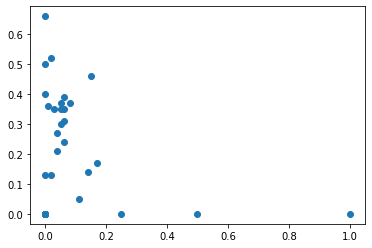

In [66]:
plt.scatter(school['percent_permanent_resident_alien'], school['percent_receives_public_assistance'])
plt.show()